In [2]:
import seaborn as sns
import pandas as pd

titanic_data = sns.load_dataset('titanic')
titanic_data = titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']]
titanic_data = titanic_data.dropna()
titanic_data = pd.get_dummies(titanic_data, drop_first = True, dtype = 'uint8')

print(titanic_data)

     pclass   age  sibsp  parch     fare  survived  sex_male  embarked_Q  \
0         3  22.0      1      0   7.2500         0         1           0   
1         1  38.0      1      0  71.2833         1         0           0   
2         3  26.0      0      0   7.9250         1         0           0   
3         1  35.0      1      0  53.1000         1         0           0   
4         3  35.0      0      0   8.0500         0         1           0   
..      ...   ...    ...    ...      ...       ...       ...         ...   
885       3  39.0      0      5  29.1250         0         0           1   
886       2  27.0      0      0  13.0000         0         1           0   
887       1  19.0      0      0  30.0000         1         0           0   
889       1  26.0      0      0  30.0000         1         1           0   
890       3  32.0      0      0   7.7500         0         1           1   

     embarked_S  
0             1  
1             0  
2             1  
3             1

In [3]:
from sklearn.model_selection import train_test_split

X_name = ["pclass", "age", "sibsp", "parch", "fare", "sex_male", "embarked_Q", "embarked_S"]
y_name = "survived"

X = titanic_data[X_name]
y = titanic_data[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率", score*100, "%")

正解率 69.93006993006993 %


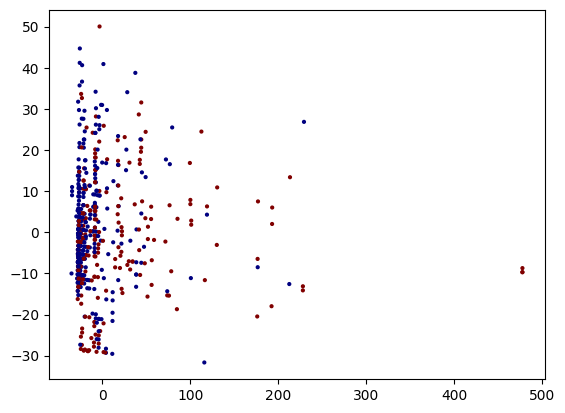

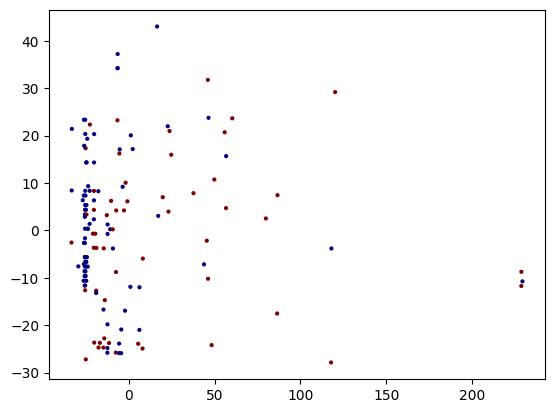

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)

vecs_train = pca.fit_transform(X_train)

plt.scatter(vecs_train[:, 0], vecs_train[:, 1], s = 4, c = y_train, cmap = "jet")
plt.show()

vecs_test = pca.fit_transform(X_test)

plt.scatter(vecs_test[:, 0], vecs_test[:, 1], s = 4, c = y_test, cmap = "jet")
plt.show()

In [6]:
pca.explained_variance_ratio_

array([0.89753444, 0.10155522])

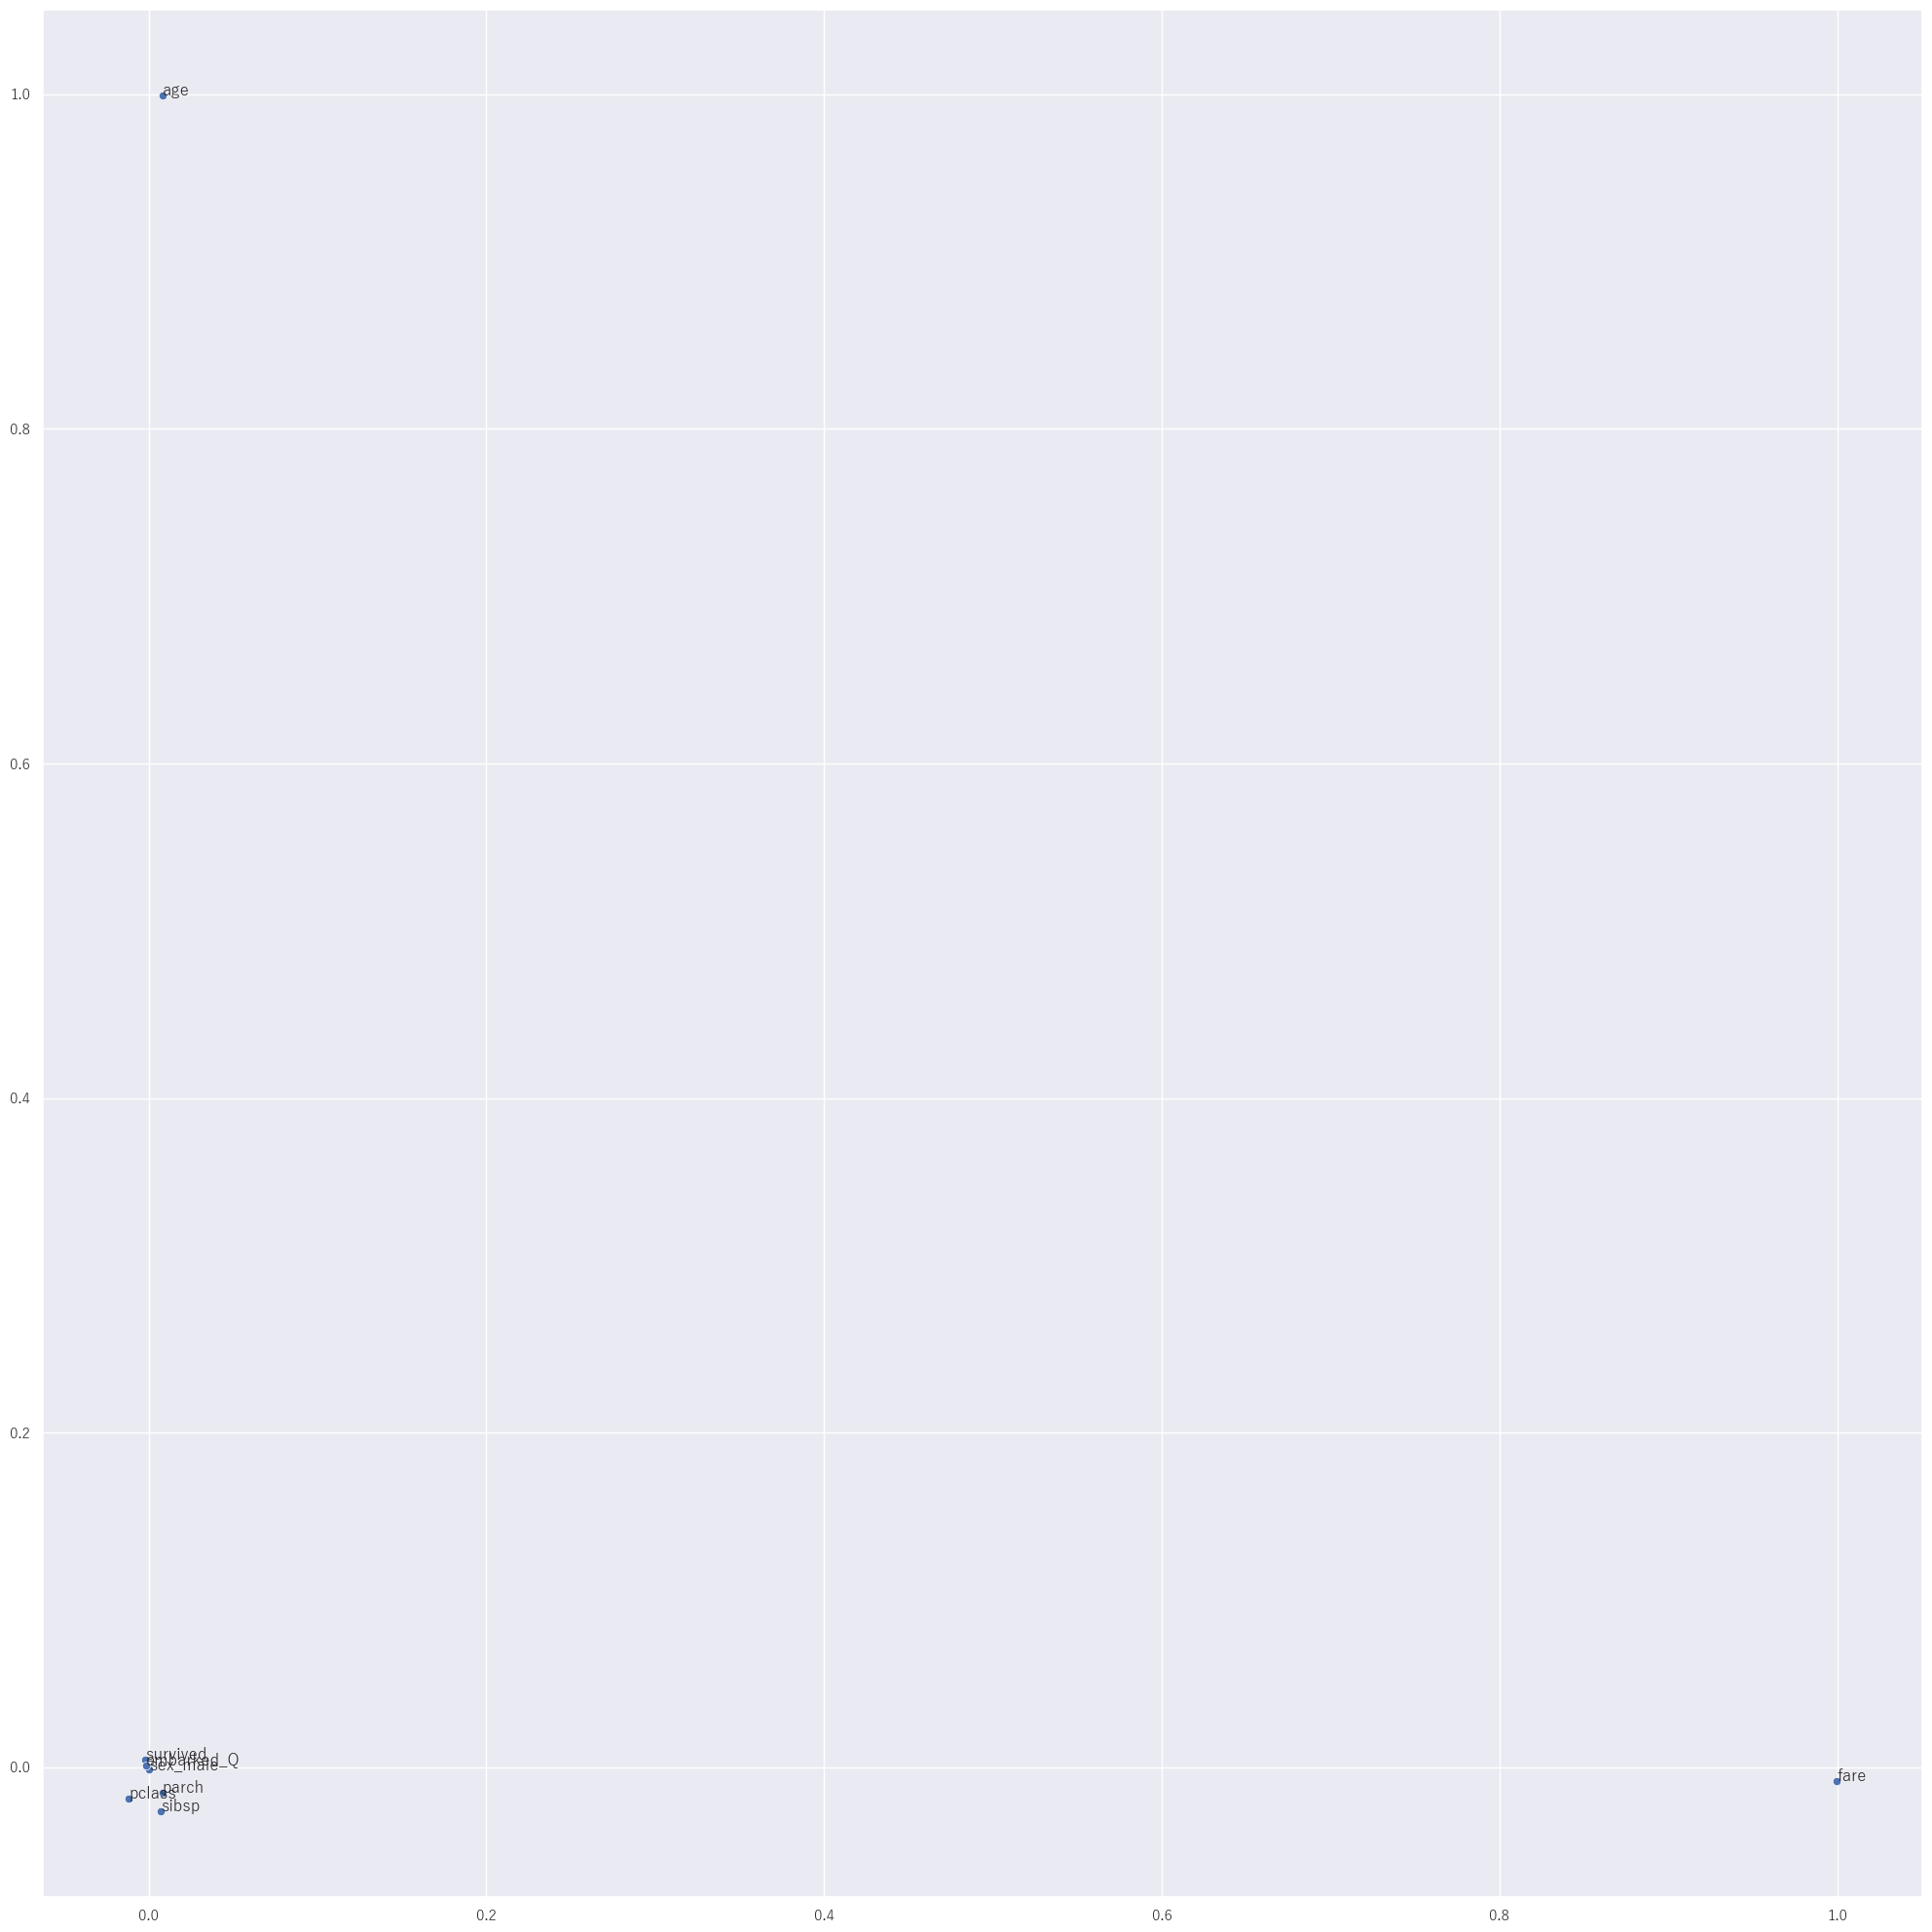

In [17]:
X_comp, y_comp = pca.components_

plt.figure(figsize = (20, 20))

sns.set(font = "Yu Gothic")
sns.scatterplot(x = X_comp, y = y_comp)

for i, (x_annot, y_annot) in enumerate(zip(X_comp, y_comp)):
    plt.annotate(titanic_data.columns[i], (x_annot, y_annot))

plt.subplots_adjust()
plt.tight_layout()
plt.show()